Author: Vista Sasmita Padmanagara

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin Project Based Intern - Data Science/loan_customer.csv')

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df.shape

(621, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# Data Cleansing

## Handling missing values

In [ ]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

Sebelum melakukan pembersihan, perlu dilakukan pengecekan tipe data dan statistik deskriptif data yang ada guna keperluan keputusan penggunaan teknik yang tepat untuk pembersihan null values.

In [ ]:
df.dtypes

loan_id                object
birth_date             object
phone_number          float64
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income      float64
coapplicant_income    float64
loan_amount             int64
loan_term_month         int64
loan_term_year          int64
credit_history        float64
has_credit_card        object
property_type          object
loan_status            object
dtype: object

In [ ]:
df.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


Penanganan null values pada data bertipe numeric:
- phone number dan credit history menggunakan mean (karena distribusi normal)
- applicant income menggunakan median (karena distribusi tidak normal dan mengandung outlier)

In [ ]:
# cleaning
df[['phone_number', 'credit_history']] = df[['phone_number', 'credit_history']].fillna(df[['phone_number', 'credit_history']].mean())
df[['applicant_income']] = df[['applicant_income']].fillna(df[['applicant_income']].median())

In [ ]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number            0
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        0
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history          0
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

Penanganan untuk data bertipe object menggunakan method 'ffill'.

In [ ]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

loan_id                0
birth_date             0
phone_number           0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history         0
has_credit_card       12
property_type          0
loan_status            0
dtype: int64

Sisa null values pada has_credit_card menggunakan method 'bfill'.

In [ ]:
df['has_credit_card'].fillna(method='bfill', inplace=True)
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## Handling Outlier

Terdapat 3 feature yang mengandung outlier, yaitu:
- applicant_income
- coapplicant_income
- loan_amount

#### Loan Amount

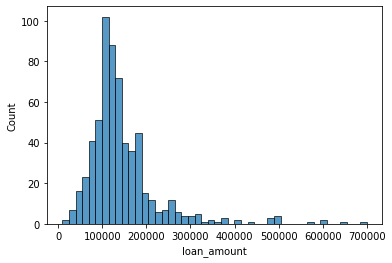

In [ ]:
sns.histplot(df, x='loan_amount')

In [ ]:
#Computing Interquantile range to calculate the boundaries
IQR=df.loan_amount.quantile(0.75)-df.loan_amount.quantile(0.25)
print(IQR)

65000.0


In [ ]:
# For finding Extreme outliers
lower_bridge=df['loan_amount'].quantile(0.25)-(IQR*3)
upper_bridge=df['loan_amount'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-95000.0
360000.0


(None, None)

In [ ]:
new_df=df.copy()

In [ ]:
new_df.loc[new_df['loan_amount']>=360000,'loan_amount']=360000

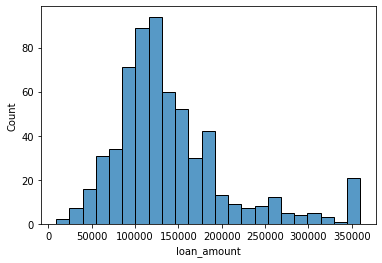

In [ ]:
sns.histplot(new_df, x='loan_amount')

#### Applicant Amount

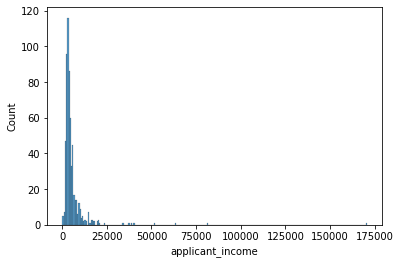

In [ ]:
sns.histplot(new_df, x='applicant_income')

In [ ]:
#Computing Interquantile range to calculate the boundaries
IQR=df.applicant_income.quantile(0.75)-df.applicant_income.quantile(0.25)
print(IQR)

2923.25


In [ ]:
# For finding Extreme outliers
lower_bridge=df['applicant_income'].quantile(0.25)-(IQR*3)
upper_bridge=df['applicant_income'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-5889.25
14573.5


(None, None)

In [ ]:
new_df2=new_df.copy()

In [ ]:
new_df2.loc[new_df2['applicant_income']>=14573.5,'applicant_income']=14573.5

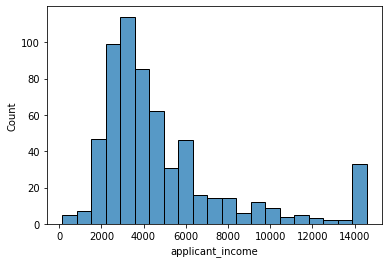

In [ ]:
sns.histplot(new_df2, x='applicant_income')

#### Coapplicant Income

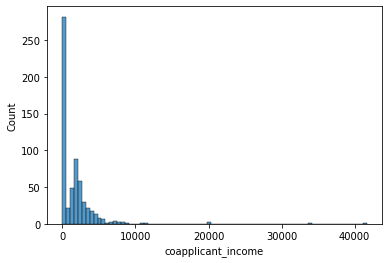

In [ ]:
sns.histplot(new_df2, x='coapplicant_income')

In [ ]:
#Computing Interquantile range to calculate the boundaries
IQR=df.coapplicant_income.quantile(0.75)-df.coapplicant_income.quantile(0.25)
print(IQR)

2287.75


In [ ]:
# For finding Extreme outliers
lower_bridge=df['coapplicant_income'].quantile(0.25)-(IQR*3)
upper_bridge=df['coapplicant_income'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-6863.25
9151.0


(None, None)

In [ ]:
new_df3=new_df.copy()

In [ ]:
new_df3.loc[new_df3['coapplicant_income']>=9151.0,'coapplicant_income']=9151.0

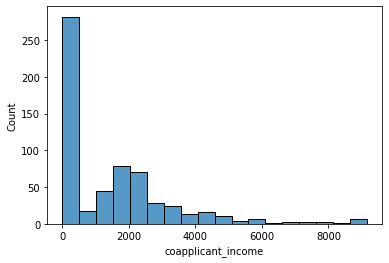

In [ ]:
sns.histplot(new_df3, x='coapplicant_income')

In [ ]:
new_df3.to_csv('loan_amount_cleaned.csv')

## Feature Encoding

In [ ]:
df = new_df3.copy()

In [ ]:
le = LabelEncoder()

df['loan_id'] = le.fit_transform(df['loan_id'])
df['birth_date'] = le.fit_transform(df['birth_date'])
df['gender'] = le.fit_transform(df['gender'])
df['married'] = le.fit_transform(df['married'])
df['dependents'] = le.fit_transform(df['dependents'])
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['has_credit_card'] = le.fit_transform(df['has_credit_card'])
df['property_type'] = le.fit_transform(df['property_type'])
df['loan_status'] = le.fit_transform(df['loan_status'])

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,0,36,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,0,1,0
1,1,74,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,0,2,1
2,2,483,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,0,1,0
3,3,93,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,0,1,0
4,4,425,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,0,1,0


# **Business Insight on Tableau**

Silahkan mengakses di:
https://public.tableau.com/views/LoanMount/Chart2?:language=en-US&:display_count=n&:origin=viz_share_link